# Tuning Models
We decided to use grid search to try and fine tune our models.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
rawData = pd.read_csv('cleanData.csv')
df_final = pd.DataFrame(rawData)

## Decision Tree

Function to generate Decision Tree of Depth x

In [ ]:
# input x and y train and test data set, depth of decision tree, and feature name of attribute
def classify(x_train, x_test, y_train, y_test, depth): 

    dectree1 = DecisionTreeClassifier(max_depth = depth)
    dectree1.fit(x_train, y_train)

    # Predict y values corresponding to x
    y_train_pred1 = dectree1.predict(x_train)
    y_test_pred1 = dectree1.predict(x_test)

    # Confusion Matrix
    CM_train1 = confusion_matrix(y_train, y_train_pred1)
    CM_test1 = confusion_matrix(y_test, y_test_pred1)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree1.score(x_train, y_train))
    print("True Positive Rate \t:", CM_train1[1][1] / (CM_train1[1][1]+CM_train1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_train1[0][0] / (CM_train1[0][0]+CM_train1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_train1[0][1] / (CM_train1[0][0]+CM_train1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_train1[1][0] / (CM_train1[1][1]+CM_train1[1][0])) # FN/(TP+FN)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree1.score(x_test, y_test))
    print("True Positive Rate \t:", CM_test1[1][1] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_test1[0][0] / (CM_test1[0][0]+CM_test1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_test1[0][1] / (CM_test1[0][0]+CM_test1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_test1[1][0] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred1),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    # Plot the trained Decision Tree
    f = plt.figure(figsize=(12,12))
    plot_tree(dectree1, filled=True, rounded=True, 
            feature_names=x_train.columns, 
            # False, then True
            class_names=["N","Y"])

    return dectree1

#### Split data set for Decision Tree

`OneHotEncoding` is done for the splitting of dataset to conduct multi-variate Classification Tree with all 5 predictors.

In [ ]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
df_cat = df_final[treevariables]
ohe.fit(df_cat)
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(df_cat.columns))

# Check the encoded variables
df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Columns: 1717 entries, Txn Count_0.0 to Ratio Transfers_1000.0
dtypes: float64(1717)
memory usage: 12.5 MB


In [ ]:
# split data
xtrain_tree, xtest_tree, ytrain_tree, ytest_tree = splitData(pd.DataFrame(df_cat_ohe), pd.DataFrame(df_final['Exchange']))
print("Train Set :", xtrain_tree.shape, ytrain_tree.shape)
print("Test Set  :", xtest_tree.shape, ytest_tree.shape)

Train Set : (761, 1717) (761, 1)
Test Set  : (191, 1717) (191, 1)


### GridSearch for Optimal maxDepth (Decision Tree)

In [ ]:
#new DT
newDT = DecisionTreeClassifier()
better_variables = ["ERC 20 Txn In", "ERC 20 Txn Out", "ERC 20 Txn", "Txn Count", "Ratio Transfers"]
#params to test
params = {"max_depth": np.arange(1, 25)}
#test all params
DTGrid = GridSearchCV(newDT, params)
DTGrid.fit(xtrain_tree, ytrain_tree)

DTGrid.best_params_

{'max_depth': 22}

Optimal max depth is 22

## Random Forest

In [2]:
def rf(predTrain, predTest, responseTrain, responseTest, n, depth):
    # predTrain, predTest, responseTrain, responseTest = train_test_split(pred, response, test_size=0.2, random_state=42)
    rforest = RandomForestClassifier(n_estimators=n, max_depth=depth)
    rforest.fit(predTrain, responseTrain.values.ravel())


    yTrainPred = rforest.predict(predTrain)
    yTestPred = rforest.predict(predTest)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", rforest.score(predTrain, responseTrain))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", rforest.score(predTest, responseTest))
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(responseTrain, yTrainPred),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(responseTest, yTestPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Split Data for Random Forest

In [23]:
forestvariables = ['Txn Count', 'ERC 20 Txn', 'ERC 20 Txn In', 'ERC 20 Txn Out']
xtrain, xtest, ytrain, ytest = splitData(pd.DataFrame(df_final[forestvariables]),pd.DataFrame(df_final["Exchange"]))
print("Train Set :", xtrain.shape, ytrain.shape)
print("Test Set  :", xtest.shape, ytest.shape)

Train Set : (761, 4) (761, 1)
Test Set  : (191, 4) (191, 1)


### GridSearch for Optimal maxDepth & n



In [24]:
#new RF model
newRF = RandomForestClassifier()

#params to test
params = {"n_estimators": np.arange(100, 1000, 100), "max_depth": np.arange(3,20)}

#test all params
rfGrid = GridSearchCV(newRF, params)

rfGrid.fit(xtrain, ytrain.values.ravel())


rfGrid.best_params_

{'max_depth': 10, 'n_estimators': 200}

## KNN

In [4]:
def splitData(a1, a2):
    xTrain, xTest, yTrain, yTest = train_test_split(a1, a2, test_size=0.2, random_state = 42)
    return [xTrain, xTest, yTrain, yTest]
    
def knn(x_train, x_test, y_train, y_test, n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    # Predict y values corresponding to x
    y_train_pred1 = knn.predict(x_train)
    y_test_pred1 = knn.predict(x_test)

    # Confusion Matrix
    CM_train1 = confusion_matrix(y_train, y_train_pred1)
    CM_test1 = confusion_matrix(y_test, y_test_pred1)
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", knn.score(x_train, y_train))
    print("True Positive Rate \t:", CM_train1[1][1] / (CM_train1[1][1]+CM_train1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_train1[0][0] / (CM_train1[0][0]+CM_train1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_train1[0][1] / (CM_train1[0][0]+CM_train1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_train1[1][0] / (CM_train1[1][1]+CM_train1[1][0])) # FN/(TP+FN)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", knn.score(x_test, y_test))
    print("True Positive Rate \t:", CM_test1[1][1] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print("True Negative Rate \t:", CM_test1[0][0] / (CM_test1[0][0]+CM_test1[0][1])) # TN/(TN+FP)
    print("False Positive Rate \t:", CM_test1[0][1] / (CM_test1[0][0]+CM_test1[0][1])) # FP/(TN+FP)
    print("False Negative Rate \t:", CM_test1[1][0] / (CM_test1[1][1]+CM_test1[1][0])) # TP/(TP+FN)
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred1),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    return knn

## Split Data for KNN

In [12]:
knnvariables = ["ERC 20 Txn In", "ERC 20 Txn Out", "ERC 20 Txn", "Txn Count"]
xtrain_knn, xtest_knn, ytrain_knn, ytest_knn = splitData(pd.DataFrame(df_final[knnvariables]),pd.DataFrame(df_final["Exchange"]))

### GridSearch for Optimal k

In [26]:
#new KNN
newKNN = KNeighborsClassifier()

#params to test
params = {"n_neighbors": np.arange(3, 15), "weights" : ["uniform", "distance"]}

KNN_Variables = ["ERC 20 Txn In", "ERC 20 Txn Out", "ERC 20 Txn", "Txn Count"]

#test all params
KNNGrid = GridSearchCV(newKNN, param_grid = params, scoring="accuracy", cv = 10)

KNNGrid.fit(xtrain_knn, ytrain_knn.values.ravel())

KNNGrid.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

## Running All 3 Models with Tuned Parameters
Using the optimal parameters from GridSearch, and the optimal combination of predictors identified from our for loop.

### Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8449408672798949
True Positive Rate 	: 0.699228791773779
True Negative Rate 	: 0.9973118279569892
False Positive Rate 	: 0.002688172043010753
False Negative Rate 	: 0.30077120822622105

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8167539267015707
True Positive Rate 	: 0.6781609195402298
True Negative Rate 	: 0.9326923076923077
False Positive Rate 	: 0.0673076923076923
False Negative Rate 	: 0.3218390804597701



DecisionTreeClassifier(max_depth=22)

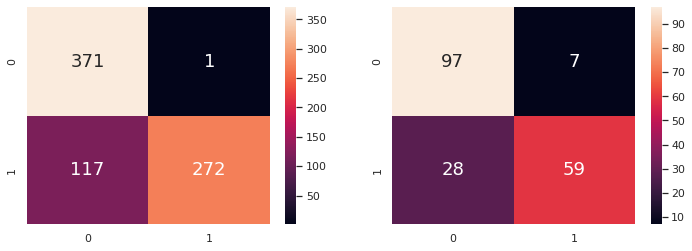

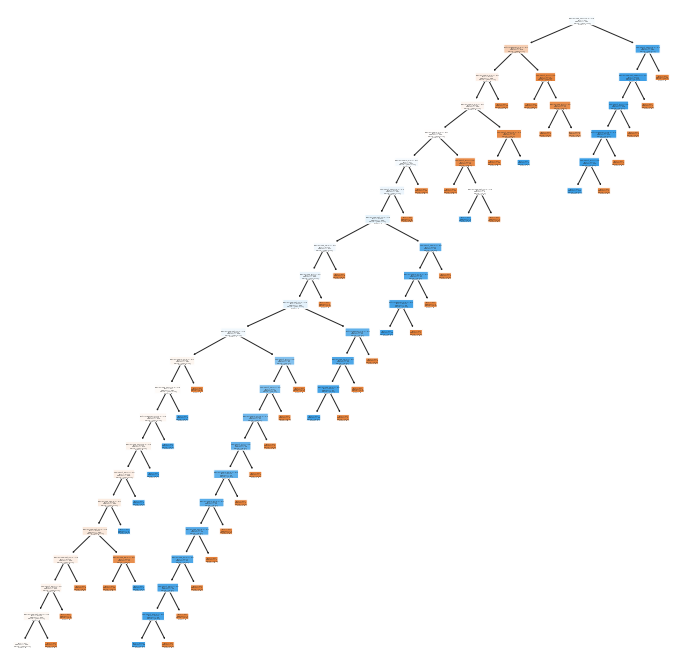

In [ ]:
classify(xtrain_tree, xtest_tree, ytrain_tree, ytest_tree, 22)

### Random Forest

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9973718791064389

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9214659685863874



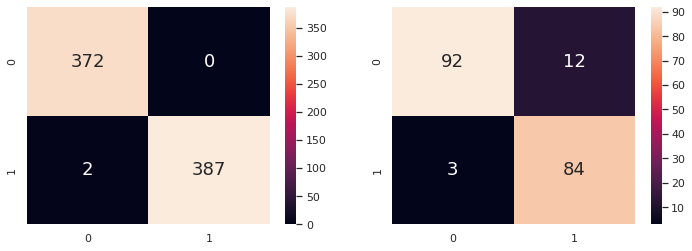

In [25]:
rf(xtrain, xtest, ytrain, ytest, 200, 10)

### K Nearest Neighbours

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9014454664914586
True Positive Rate 	: 0.8611825192802056
True Negative Rate 	: 0.9435483870967742
False Positive Rate 	: 0.056451612903225805
False Negative Rate 	: 0.13881748071979436

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.837696335078534
True Positive Rate 	: 0.8275862068965517
True Negative Rate 	: 0.8461538461538461
False Positive Rate 	: 0.15384615384615385
False Negative Rate 	: 0.1724137931034483



KNeighborsClassifier(n_neighbors=12)

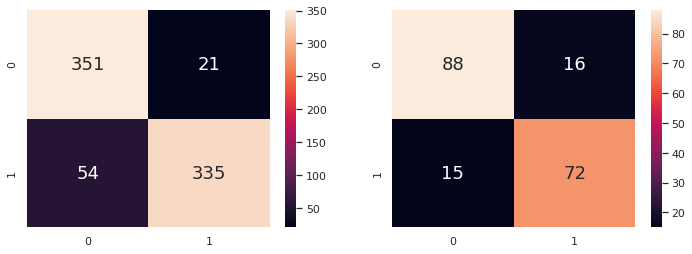

In [27]:
knn(xtrain_knn, xtest_knn, ytrain_knn, ytest_knn, 12)

# Conclusion
Our Random Forest Model has the best performance, out of the 3 classification models, with a classification accuracy on the test set of 92%.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=696215f1-387b-461d-aa4c-0ccf546cb4fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>